In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/content/updated_preprocessed_data.csv')

In [3]:
df.drop(columns=['reviewText', 'summary',], inplace=True)

In [4]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
overall              0
verified             0
text                 0
additional_clean    59
sentiment            0
dtype: int64


In [5]:
df['additional_clean'].fillna('', inplace=True)

In [6]:
df = df[df['verified'] == True]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['additional_clean'], df['sentiment'], test_size=0.2, random_state=42)

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_regression_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [12]:
y_pred = logistic_regression_model.predict(X_test_tfidf)

In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.47      0.58       216
     neutral       0.38      0.12      0.18       190
    positive       0.85      0.98      0.91      1442

    accuracy                           0.83      1848
   macro avg       0.66      0.52      0.56      1848
weighted avg       0.79      0.83      0.80      1848



In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)

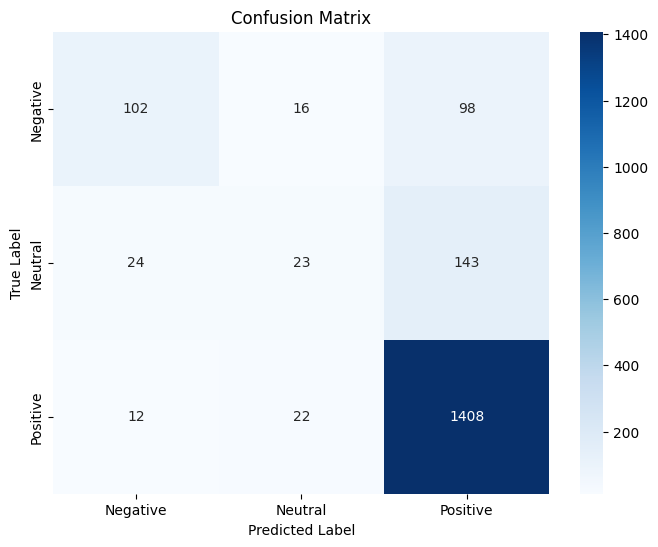

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_tfidf.toarray())

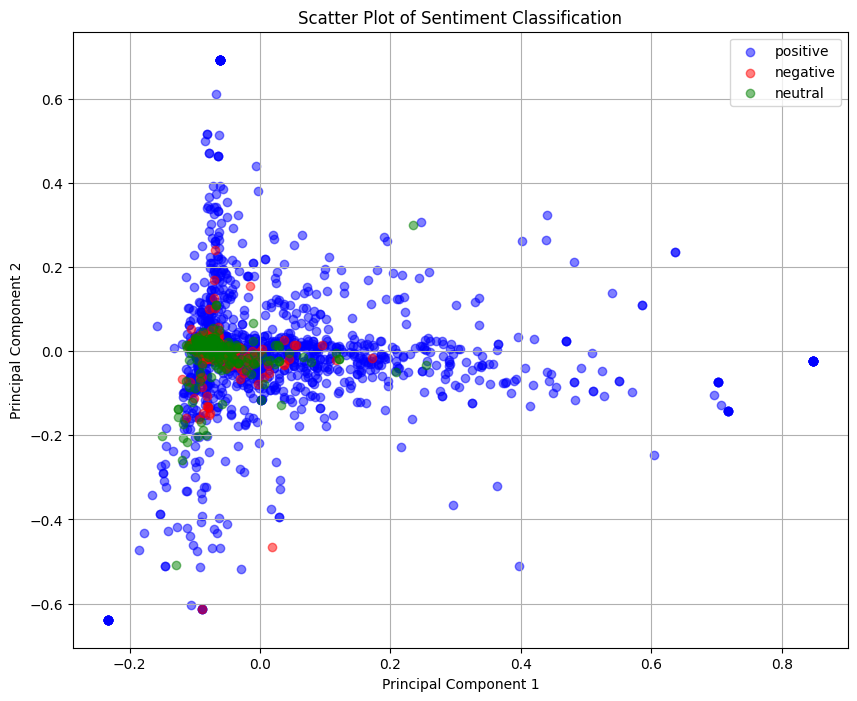

In [19]:
plt.figure(figsize=(10, 8))
colors = {'positive': 'blue', 'negative': 'red', 'neutral': 'green'}
for sentiment, color in colors.items():
    plt.scatter(X_pca[y_test == sentiment][:, 0], X_pca[y_test == sentiment][:, 1], c=color, label=sentiment, alpha=0.5)

plt.title('Scatter Plot of Sentiment Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()